In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsTransformer
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [2]:
filepath="C:/Users/CCEC/Desktop/forest/"
filename="train.csv"

In [3]:
df=pd.read_csv(filepath+filename,index_col=0)
X,y=df.iloc[:,:-1],df.iloc[:,-1]
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
y_test.head()

Id
4429     4
12400    4
4648     4
5954     4
2947     3
Name: Cover_Type, dtype: int64

In [5]:
knn = KNeighborsClassifier(n_neighbors=5,weights="distance")
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred


array([4, 4, 4, ..., 7, 3, 3], dtype=int64)

In [6]:
knn.score(X_test,y_test)


0.8234126984126984

In [7]:
knn.score(X_train,y_train)

1.0

In [8]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.77      0.65      0.70       439
           2       0.71      0.59      0.64       411
           3       0.84      0.76      0.80       418
           4       0.87      0.97      0.91       438
           5       0.83      0.96      0.89       428
           6       0.83      0.85      0.84       471
           7       0.88      0.98      0.92       419

    accuracy                           0.82      3024
   macro avg       0.82      0.82      0.82      3024
weighted avg       0.82      0.82      0.82      3024



In [9]:
confusion_matrix(y_test,y_pred)

array([[284,  81,   0,   0,  23,   1,  50],
       [ 79, 243,  18,   0,  42,  21,   8],
       [  0,   4, 317,  43,   8,  46,   0],
       [  0,   0,   6, 424,   0,   8,   0],
       [  0,   8,   4,   0, 411,   5,   0],
       [  0,   4,  33,  22,  10, 402,   0],
       [  7,   3,   0,   0,   0,   0, 409]], dtype=int64)

In [12]:
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import os

In [13]:
filepath="C:/Users/CCEC/Desktop/water/"
filenames=os.listdir(filepath)
filenames[0:5]

['1_1.jpg', '1_10.jpg', '1_100.jpg', '1_1000.jpg', '1_1001.jpg']

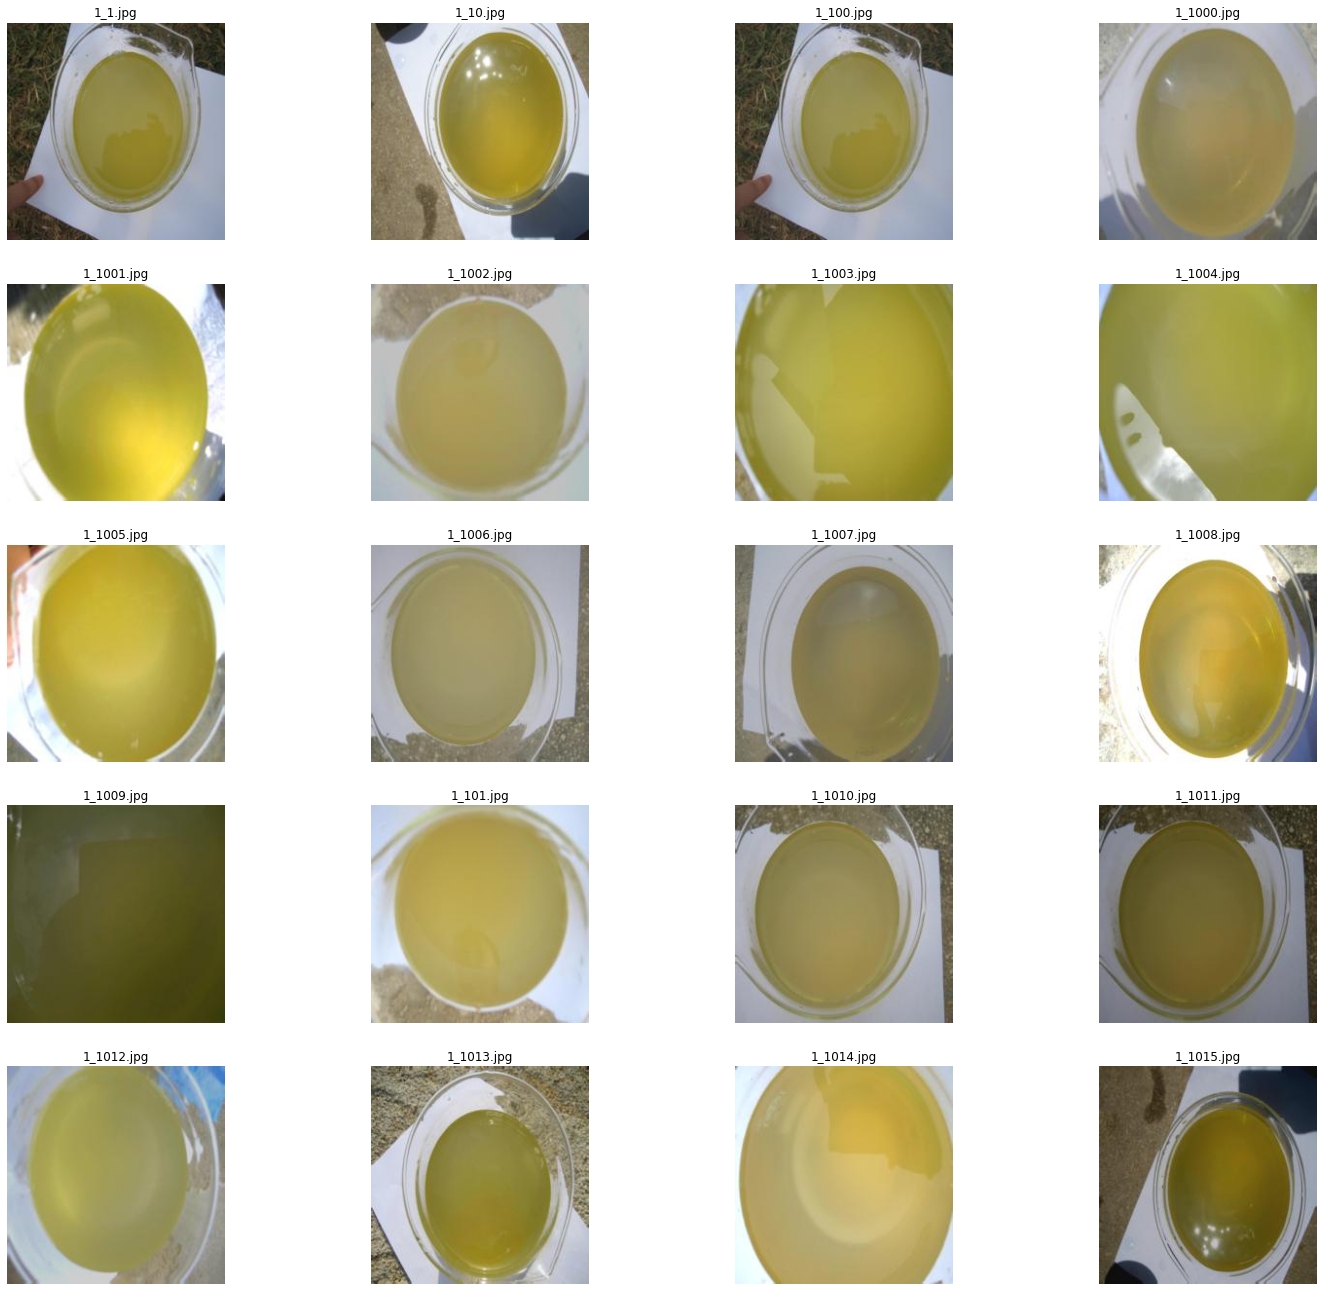

In [14]:
nsize =20
n=1
plt.figure(figsize= ((nsize//4)*5, 4*7))
for i in range(1, nsize+1):
    img=Image.open(filepath+filenames[i-1])
    plt. subplot (nsize//4+1, 4, n)
    plt. axis("off")
    plt. title (filenames[i-1])
    plt. imshow (img)
    n+=1
plt.show()

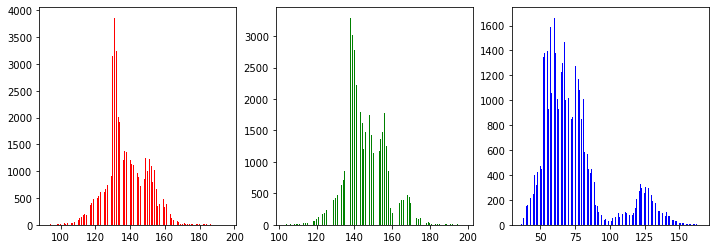

In [15]:
temp=Image. open(filepath+"1_24.jpg" )
temp=np. array(temp)
plt. figure (figsize=(12, 4))
plt. subplot(1, 3, 1)
plt. hist(temp[:, :, 0]. flatten(), bins=255, color="r")
plt. subplot(1, 3, 2)
plt. hist(temp[:, :,1]. flatten(), bins=255, color="g")
plt. subplot(1,3, 3)
plt. hist(temp[:, :, 2]. flatten(), bins=255, color="b")
plt. show ()

In [16]:
def info (arimg):
    jieju1=np.mean (arimg)
    jieju2=np.std(arimg)
    fh=1
    jieju3 =np.sum(np. power (arimg- jieju1,3))
    if jieju3<0:
        fh=-1
        jieju3=-jieju3
    jieju3=np. power (jieju3, 1/3)
    jieju3 = jieju3*fh
    return jieju1, jieju2, jieju3

In [19]:
columns=["level","xh","r一阶矩","g一阶矩","b一阶矩","r二阶矩","g二阶矩","b二阶矩","r三阶矩","g三阶矩","b三阶矩"] 
df=pd.DataFrame (columns=columns)
n=0
for i in filenames:
    
    if os.path.isfile(filepath+i) and i[-3:]=="jpg": 
        level=int(i[0]) 
        xh=i[0:-4]
        img= np. array (Image. open(filepath+i)) 
        rows, cols=img. shape[0:2]
        subimg=img [rows//2-25:rows//2+26, cols//2- 25:cols//2+26]
        Image. fromarray(subimg).save(filepath+"sub/"+i)
        subimg=subimg/255
        r1, r2, r3=info(subimg[:,:,0])
        g1, g2, g3=info(subimg[:,:,1])
        b1, b2, b3=info(subimg[:,:,2])
        df.loc[n]=[level,xh,r1,g1,b1,r2,g2,b2,r3,g3,b3] 
        n+=1
df["level"]=df ["level"].astype(int) 
df.head()

,level,xh,r一阶矩,g一阶矩,b一阶矩,r二阶矩,g二阶矩,b二阶矩,r三阶矩,g三阶矩,b三阶矩
0,1,1_1,0.576424,0.536282,0.237916,0.013618,0.018891,0.055450,-0.159341,-0.189217,-0.639193
1,1,1_10,0.639029,0.567661,0.205601,0.054812,0.037404,0.026905,-0.451784,-0.332811,0.325360
2,1,1_100,0.594038,0.554701,0.276489,0.013522,0.017697,0.052121,-0.172714,-0.176936,-0.595139
3,1,1_1000,0.624725,0.558272,0.364680,0.011636,0.012690,0.024796,-0.156377,-0.156823,-0.130671
4,1,1_1001,0.735001,0.677818,0.222008,0.056640,0.043797,0.017883,0.713607,0.542457,0.057332


In [20]:
df.to_csv(filepath+"imagefeatures.csv")
print("%s"%(filepath+"imagefeatures.csv"))

C:/Users/CCEC/Desktop/water/imagefeatures.csv


In [21]:
df=pd.read_csv(filepath+"imagefeatures.csv",encoding="utf-8",index_col=0)
df.head()

,level,xh,r一阶矩,g一阶矩,b一阶矩,r二阶矩,g二阶矩,b二阶矩,r三阶矩,g三阶矩,b三阶矩
0,1,1_1,0.576424,0.536282,0.237916,0.013618,0.018891,0.055450,-0.159341,-0.189217,-0.639193
1,1,1_10,0.639029,0.567661,0.205601,0.054812,0.037404,0.026905,-0.451784,-0.332811,0.325360
2,1,1_100,0.594038,0.554701,0.276489,0.013522,0.017697,0.052121,-0.172714,-0.176936,-0.595139
3,1,1_1000,0.624725,0.558272,0.364680,0.011636,0.012690,0.024796,-0.156377,-0.156823,-0.130671
4,1,1_1001,0.735001,0.677818,0.222008,0.056640,0.043797,0.017883,0.713607,0.542457,0.057332


In [22]:
y=df["level"]
X=df.iloc[:,2:]
y

0       1
1       1
2       1
3       1
4       1
       ..
5198    5
5199    5
5200    5
5201    5
5202    5
Name: level, Length: 5203, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_test.shape,y_test.shape

((1041, 9), (1041,))

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train,y_train)
y_kncpred=knc.predict(X_test)
y_kncpred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([4, 4, 4, ..., 4, 2, 1], dtype=int64)

In [25]:
from sklearn import svm
svc=svm.SVC()
svc.fit(X_train,y_train)
y_svcpred=svc.predict(X_test)
y_svcpred

array([4, 3, 4, ..., 2, 1, 4], dtype=int64)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import recall_score, precision_score

In [27]:
print("KNN模型的准确率:",accuracy_score(y_test,y_kncpred).round(4))
print("SVM模型的准确率:",accuracy_score(y_test,y_svcpred).round(4))

KNN模型的准确率: 0.7896
SVM模型的准确率: 0.6916


In [28]:
confusion_matrix(y_test,y_kncpred)

array([[181,  15,  18,   6,   0],
       [ 22, 172,   5,  10,   1],
       [ 37,  15, 140,  18,   5],
       [ 11,  17,  18, 153,   8],
       [  1,  10,   0,   2, 176]], dtype=int64)

In [29]:
confusion_matrix(y_test,y_svcpred)

array([[166,  17,  25,   9,   3],
       [ 27, 136,  10,  31,   6],
       [ 44,   9, 125,  29,   8],
       [ 19,  23,  25, 129,  11],
       [  6,   9,   0,  10, 164]], dtype=int64)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_rfcpred=rfc.predict(X_test)
y_rfcpred

array([4, 4, 5, ..., 4, 2, 1], dtype=int64)

In [31]:
accuracy_score(y_test,y_rfcpred).round(4)

0.8415